# Modelling Gradient Descent

Here we will create a simple algorithm that uses gradient descent to optimise a simple linear regression model. 
The data are fetched from the [BOM](http://www.bom.gov.au/climate/data/index.shtml) and show temperatures for the Sydney (Kinsford Smith) and Newcastle (Williamstown RAAF) airports. 

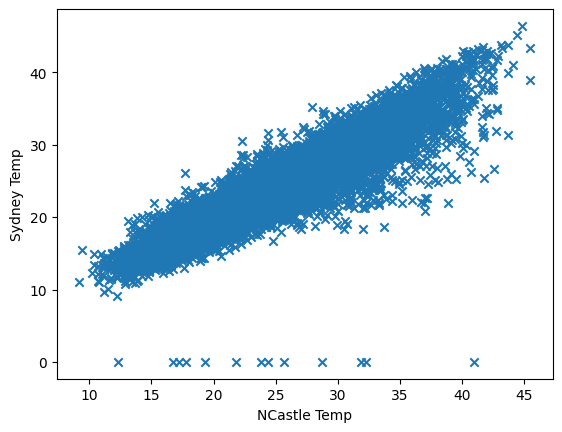

DDMMYYYY  MaxTempNewcastleAirport  MaxTempSydneyAirport
252  19420910                     18.6                  16.2
253  19420911                     18.8                  17.1
254  19420912                     18.9                  14.9
255  19420913                     19.6                  20.2
256  19420914                     23.8                  24.3

In [23]:
# Import dependancies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the dataset
fulldataset = pd.read_csv('../datasets/AirportTemps.csv')
dataset = fulldataset.dropna()

# Plot the data (to observe correlation)
plt.scatter(dataset['MaxTempNewcastleAirport'],dataset['MaxTempSydneyAirport'],marker='x')
plt.xlabel('NCastle Temp')
plt.ylabel('Sydney Temp')
plt.show()

# See a sample of raw data
dataset.head()

Here's the beginnings of an OOP approach. It plots the existing data in blue and the predicted line in red. 


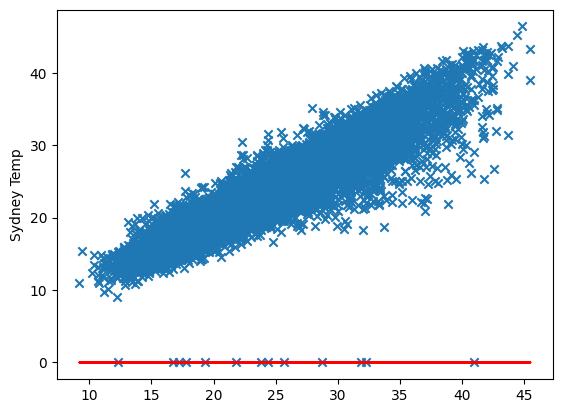

Current loss = 531.2686256339159, loss_if_m_increased = 45.58230422982812, loss_if_m_decreased = 1559.9521969296861
Increase by m 0.6914779555926018
Current loss = 45.58230422982812, loss_if_b_increased = 43.00840014118515, loss_if_b_decreased=48.23825646608477
Increase b by 0.20254400461836758


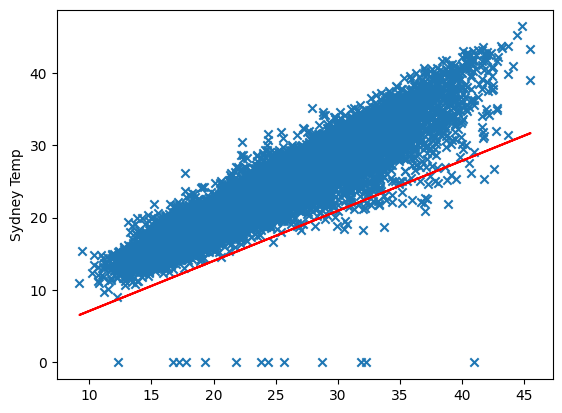

Current loss = 43.00840014118515, loss_if_m_increased = 5.897045111932662, loss_if_m_decreased = 124.07763612197888
Increase by m 0.19674236993354186
Current loss = 5.897045111932662, loss_if_b_increased = 5.6572132511743085, loss_if_b_decreased=6.147491653892492
Increase b by 0.07285149690115775


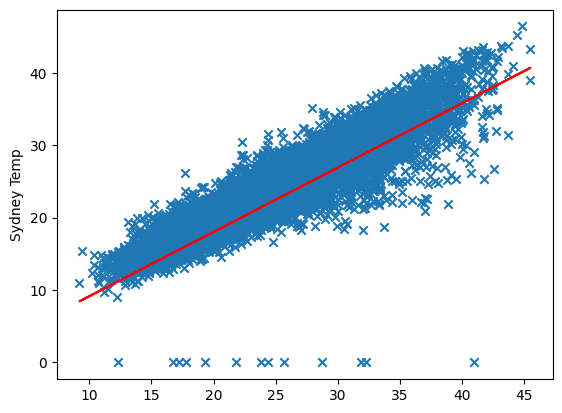

Current loss = 5.6572132511743085, loss_if_m_increased = 3.301535569715705, loss_if_m_decreased = 13.794996423566179
Increase by m 0.07135469098844782
Current loss = 3.301535569715705, loss_if_b_increased = 3.309731240053806, loss_if_b_decreased=3.299282663403093
decrease b by 0.05451038444869137


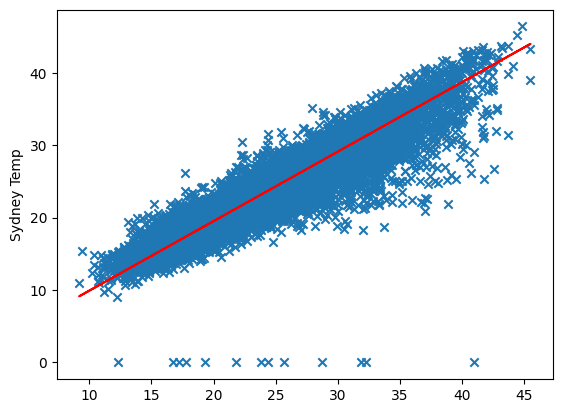

Current loss = 3.309731240053806, loss_if_m_increased = 5.548848183384279, loss_if_m_decreased = 4.453413269814197
Current loss = 3.309731240053806, loss_if_b_increased = 3.3238909023709016, loss_if_b_decreased=3.301529093968807
decrease b by 0.05457800029360205


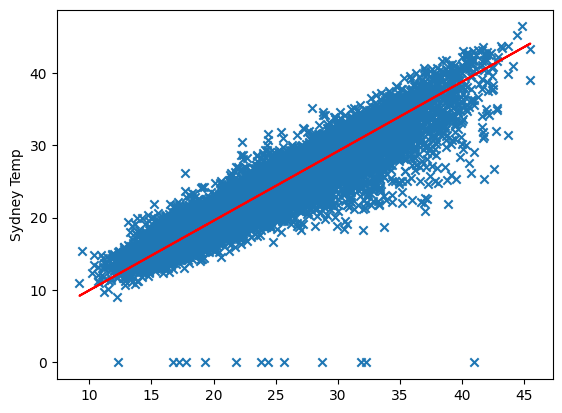

Current loss = 3.3238909023709016, loss_if_m_increased = 5.710099601686056, loss_if_m_decreased = 4.334953436179661
Current loss = 3.3238909023709016, loss_if_b_increased = 3.344057446207244, loss_if_b_decreased=3.3097073621588264
decrease b by 0.054694623247023205


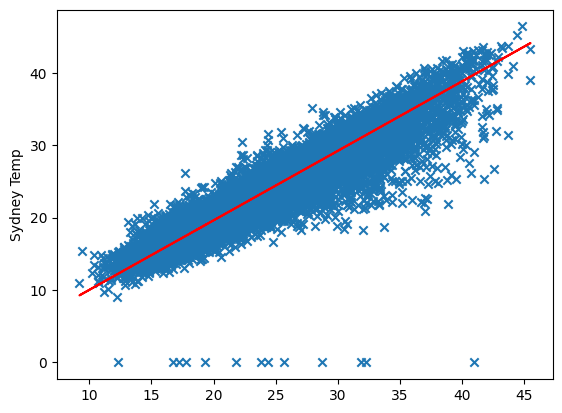

Current loss = 3.344057446207244, loss_if_m_increased = 5.882057246812169, loss_if_m_decreased = 4.2239406320175
Current loss = 3.344057446207244, loss_if_b_increased = 3.3702952889878515, loss_if_b_decreased=3.3238389068298093
decrease b by 0.054860292576566876


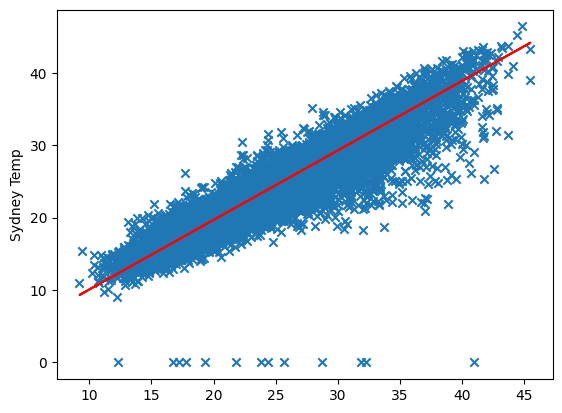

Current loss = 3.3702952889878515, loss_if_m_increased = 6.06532201088833, loss_if_m_decreased = 4.119968639597097
Current loss = 3.3702952889878515, loss_if_b_increased = 3.4026905645744128, loss_if_b_decreased=3.3439665449214675
decrease b by 0.05507509201162596


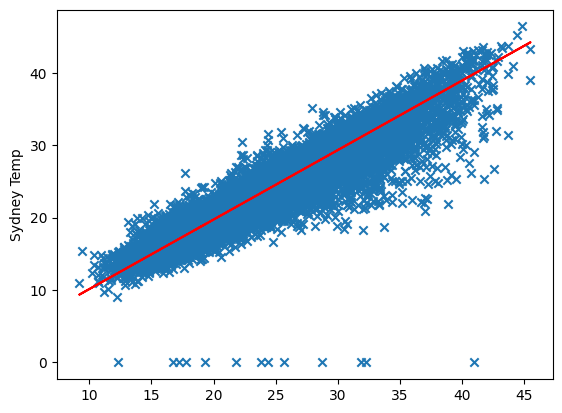

Current loss = 3.4026905645744128, loss_if_m_increased = 6.260533572676194, loss_if_m_decreased = 4.022658083287849
Current loss = 3.4026905645744128, loss_if_b_increased = 3.441351389781511, loss_if_b_decreased=3.370154582383553
decrease b by 0.0553391498680362


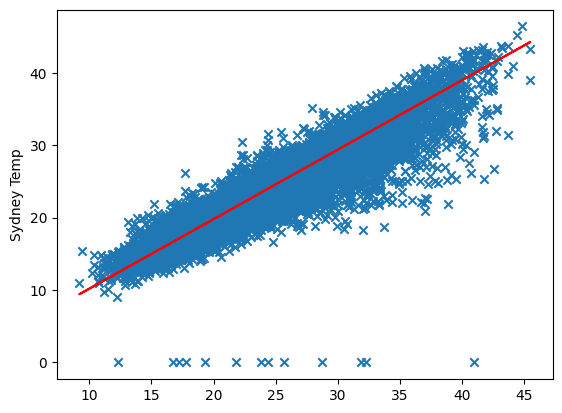

Current loss = 3.441351389781511, loss_if_m_increased = 6.468372626311071, loss_if_m_decreased = 3.931655006253742
Current loss = 3.441351389781511, loss_if_b_increased = 3.486408209704587, loss_if_b_decreased=3.4024890023600385
decrease b by 0.055652639207888065


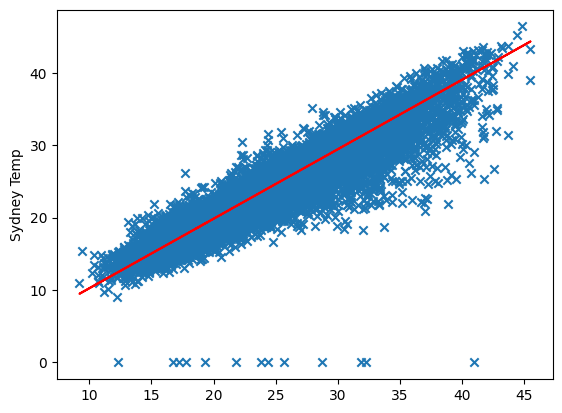

Current loss = 3.486408209704587, loss_if_m_increased = 6.689563253843105, loss_if_m_decreased = 3.8466295415199414
Current loss = 3.486408209704587, loss_if_b_increased = 3.5380142229867944, loss_if_b_decreased=3.4410777311998495
decrease b by 0.056015778033819436


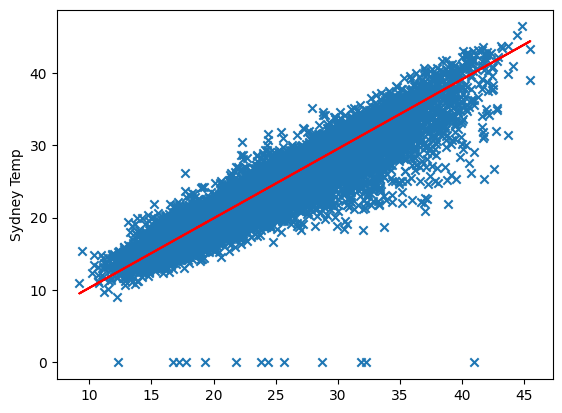

Current loss = 3.5380142229867944, loss_if_m_increased = 6.924875449828966, loss_if_m_decreased = 3.7672746725699278
Current loss = 3.5380142229867944, loss_if_b_increased = 3.596345888434591, loss_if_b_decreased=3.4860509831403754
decrease b by 0.056428829517261074


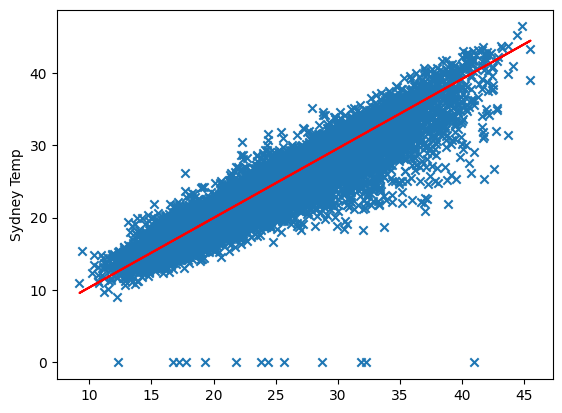

Current loss = 3.596345888434591, loss_if_m_increased = 7.1751278067449284, loss_if_m_decreased = 3.6933050789637383
Current loss = 3.596345888434591, loss_if_b_increased = 3.661603514679288, loss_if_b_decreased=3.537561684789072
decrease b by 0.05689210226025341


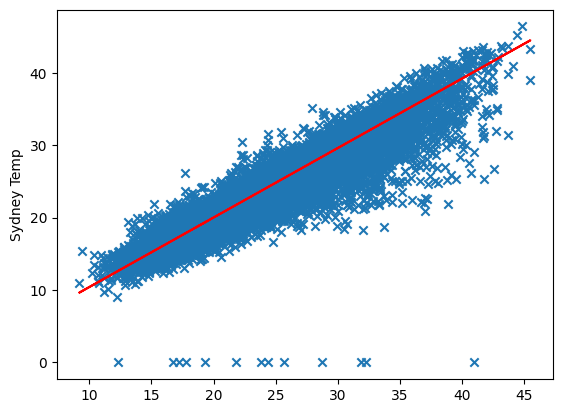

Current loss = 3.661603514679288, loss_if_m_increased = 7.4411903705460976, loss_if_m_decreased = 3.624456062781017
decrease by m 0.05740595059060828
Current loss = 3.624456062781017, loss_if_b_increased = 3.5441558250489344, loss_if_b_decreased=3.711280321426105
Increase b by 0.057114012785855935


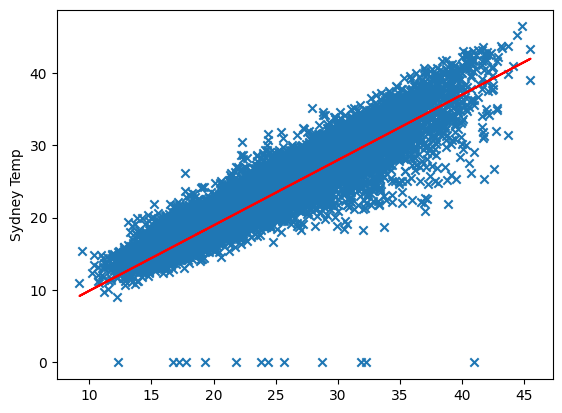

Current loss = 3.5441558250489344, loss_if_m_increased = 3.700798023839529, loss_if_m_decreased = 7.00991249066119
Current loss = 3.5441558250489344, loss_if_b_increased = 3.4711655132401646, loss_if_b_decreased=3.6235256173427963
Increase b by 0.05647778538986847


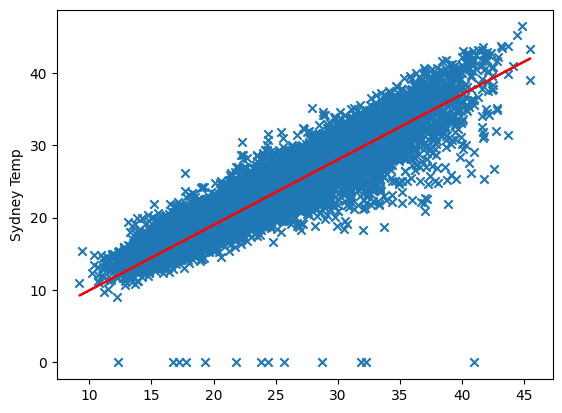

Current loss = 3.4711655132401646, loss_if_m_increased = 3.754290549111112, loss_if_m_decreased = 6.735837649391665
Current loss = 3.4711655132401646, loss_if_b_increased = 3.4052114857065208, loss_if_b_decreased=3.5433676386976374
Increase b by 0.055893192446988996


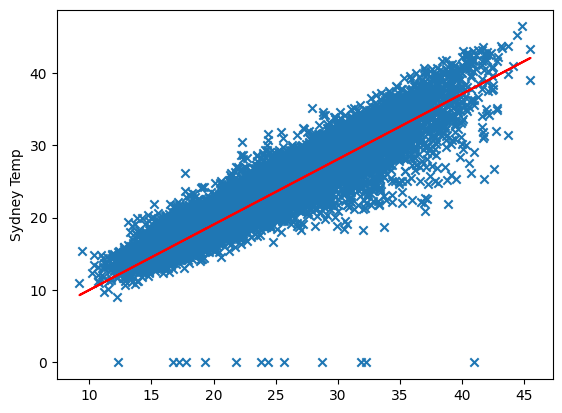

Current loss = 3.4052114857065208, loss_if_m_increased = 3.81261626604543, loss_if_m_decreased = 6.478193806774061
Current loss = 3.4052114857065208, loss_if_b_increased = 3.346045961933648, loss_if_b_decreased=3.4705063901536692
Increase b by 0.05535964538484571


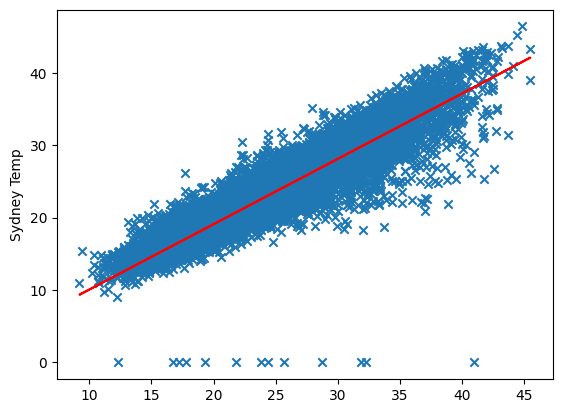

Current loss = 3.346045961933648, loss_if_m_increased = 3.8759837164912185, loss_if_m_decreased = 6.236023609256252
Current loss = 3.346045961933648, loss_if_b_increased = 3.2934460812732174, loss_if_b_decreased=3.4046687253255548
Increase b by 0.05487660125900914


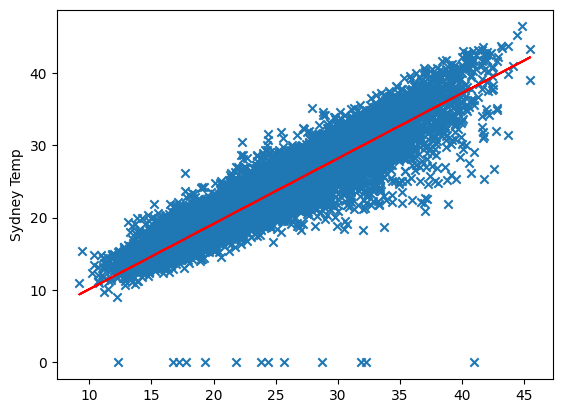

Current loss = 3.2934460812732174, loss_if_m_increased = 3.944618919984731, loss_if_m_decreased = 6.008427535343507
Current loss = 3.2934460812732174, loss_if_b_increased = 3.2472130528057357, loss_if_b_decreased=3.3456073126869916
Increase b by 0.054443562274578396


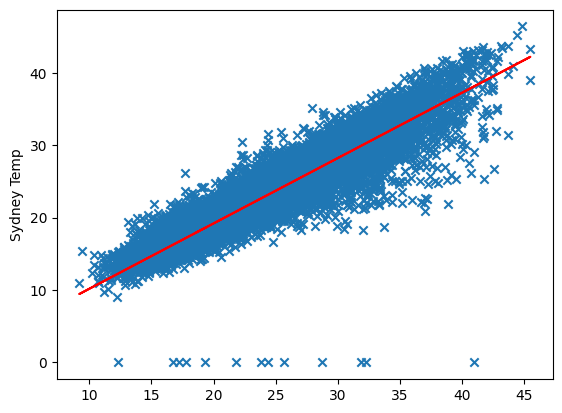

Current loss = 3.2472130528057357, loss_if_m_increased = 4.018766148409148, loss_if_m_decreased = 5.79456055175933
Current loss = 3.2472130528057357, loss_if_b_increased = 3.207171393124272, loss_if_b_decreased=3.2930996959822494
Increase b by 0.05406007535626604


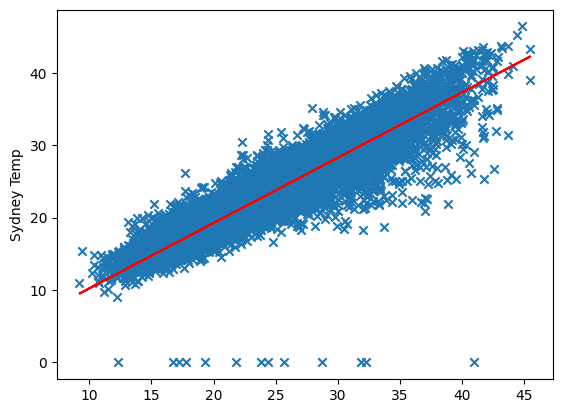

Current loss = 3.207171393124272, loss_if_m_increased = 4.098688764766554, loss_if_m_decreased = 5.593628971197487
Current loss = 3.207171393124272, loss_if_b_increased = 3.173168249154991, loss_if_b_decreased=3.2469474456011747
Increase b by 0.053725731766183


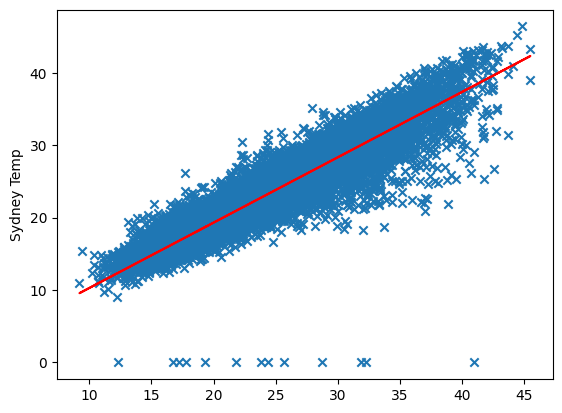

Current loss = 3.173168249154991, loss_if_m_increased = 4.184670129062649, loss_if_m_decreased = 5.404887499949036
Current loss = 3.173168249154991, loss_if_b_increased = 3.1450728034444877, loss_if_b_decreased=3.206975397713975
Increase b by 0.05344016676844761


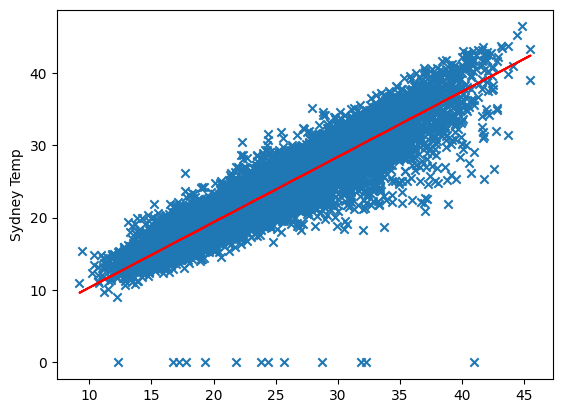

Current loss = 3.1450728034444877, loss_if_m_increased = 4.277014574539781, loss_if_m_decreased = 5.2276364644020585
Current loss = 3.1450728034444877, loss_if_b_increased = 3.1227757596481873, loss_if_b_decreased=3.17303097828699
Increase b by 0.05320305933966616


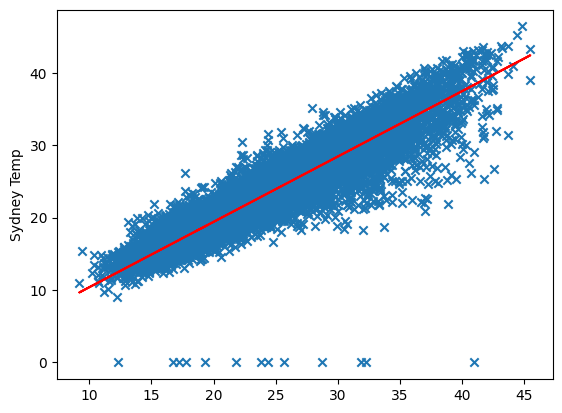

Current loss = 3.1227757596481873, loss_if_m_increased = 4.376048457738719, loss_if_m_decreased = 5.061219206086417
Current loss = 3.1227757596481873, loss_if_b_increased = 3.1061889062493657, loss_if_b_decreased=3.1449836094143744
Increase b by 0.053014131924264955


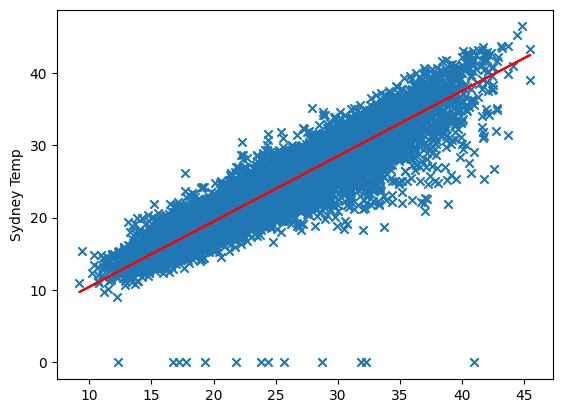

Current loss = 3.1061889062493657, loss_if_m_increased = 4.482121286124526, loss_if_m_decreased = 4.905019635573301
Current loss = 3.1061889062493657, loss_if_b_increased = 3.0952447568256165, loss_if_b_decreased=3.122724195704363
Increase b by 0.05287315023359616


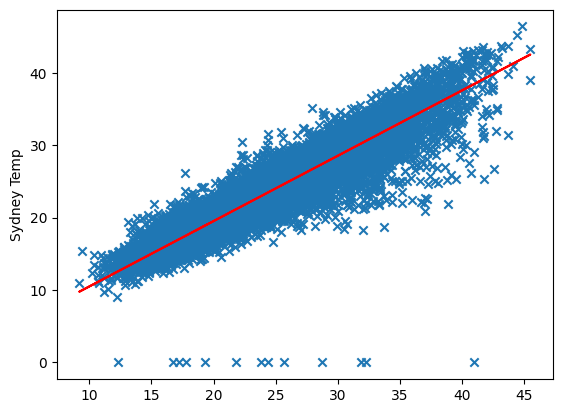

Current loss = 3.0952447568256165, loss_if_m_increased = 4.595606927278565, loss_if_m_decreased = 4.758459936140909
Current loss = 3.0952447568256165, loss_if_b_increased = 3.089896265459928, loss_if_b_decreased=3.106164688753592
Increase b by 0.052779923087695524


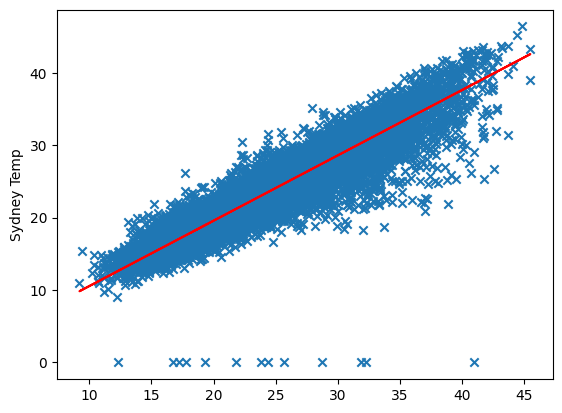

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


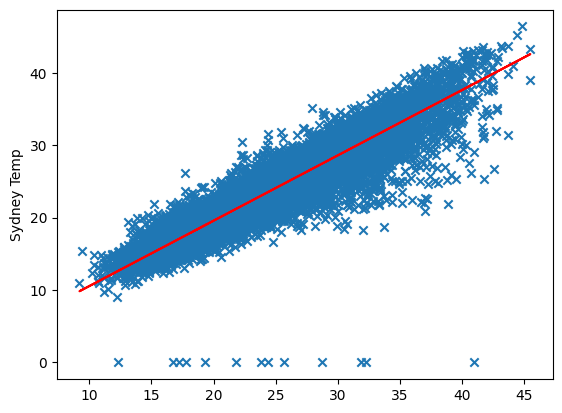

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


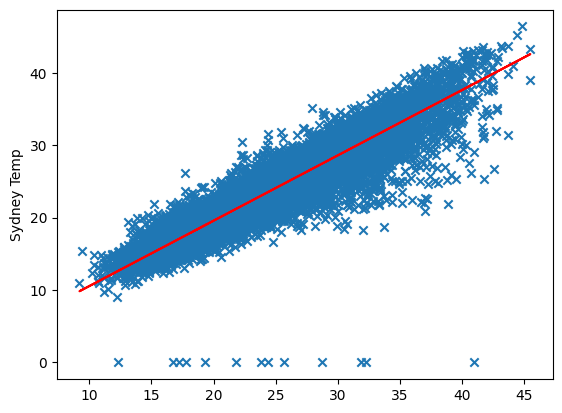

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


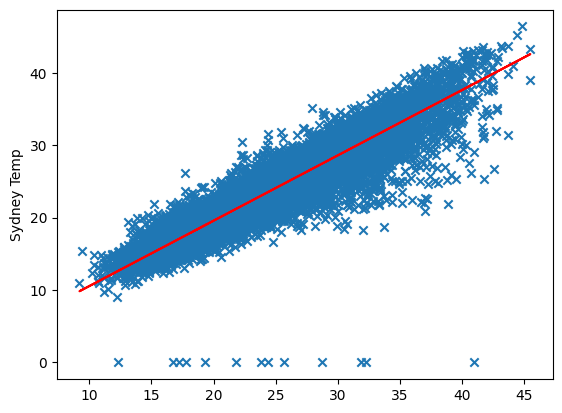

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


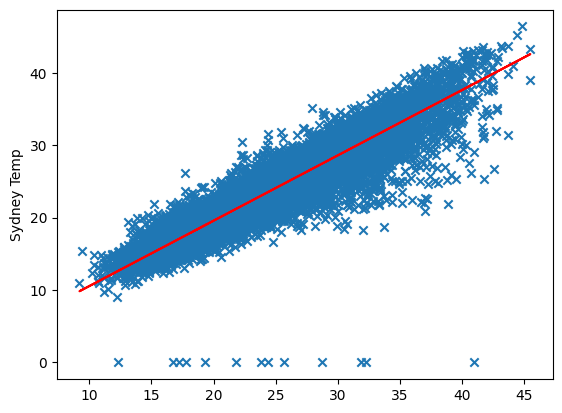

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


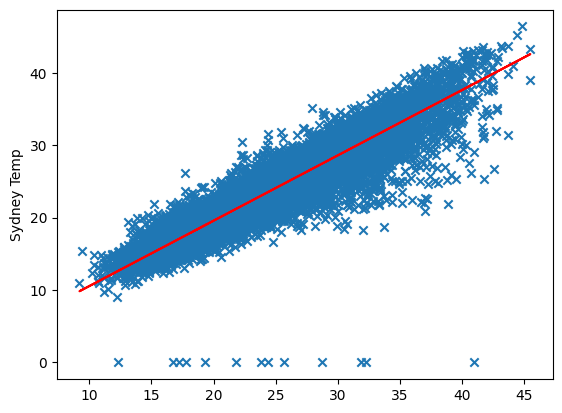

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


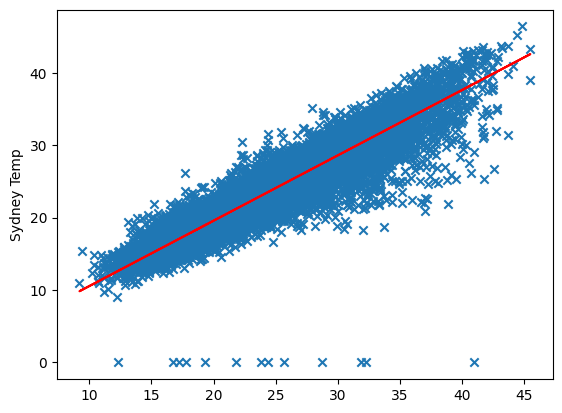

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


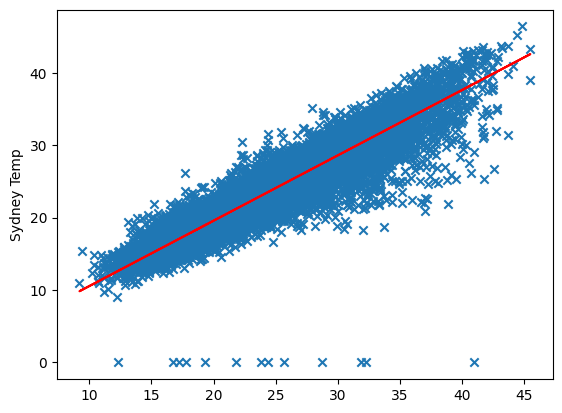

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


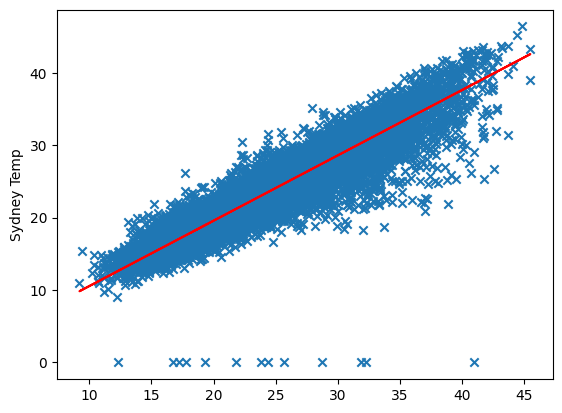

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


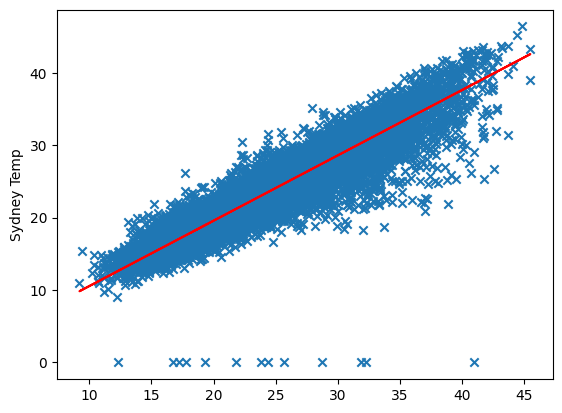

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


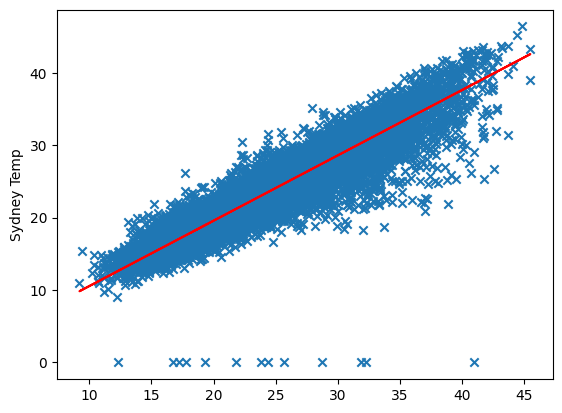

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


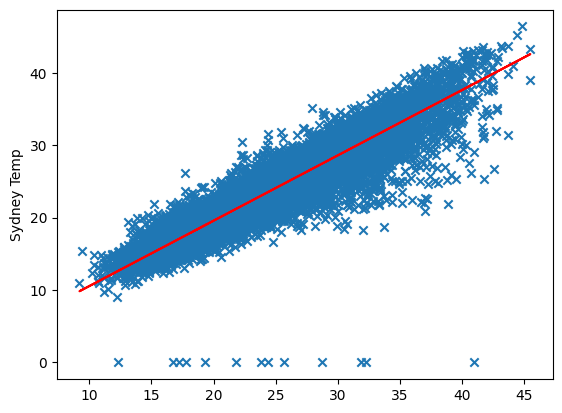

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


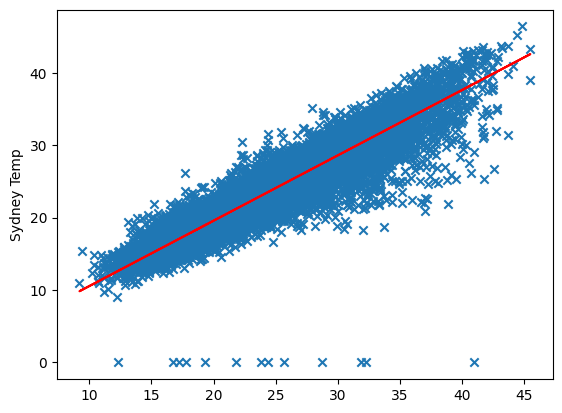

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


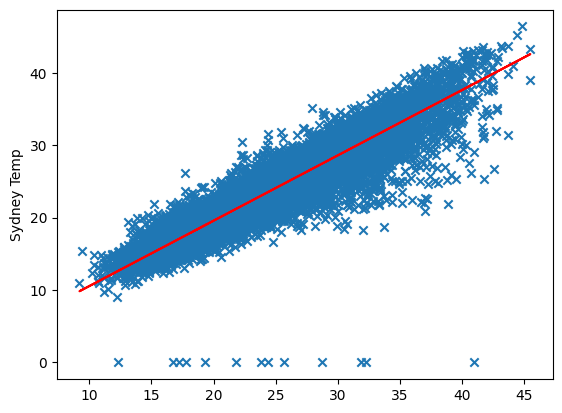

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


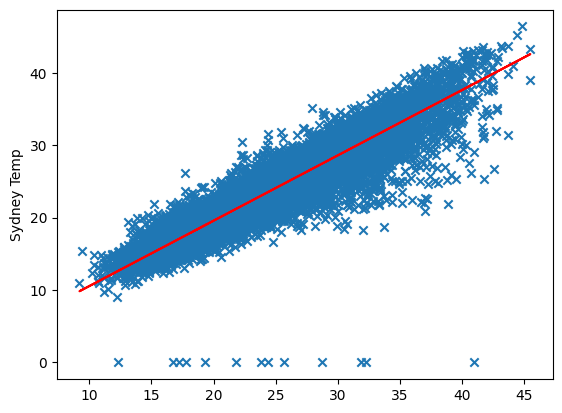

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


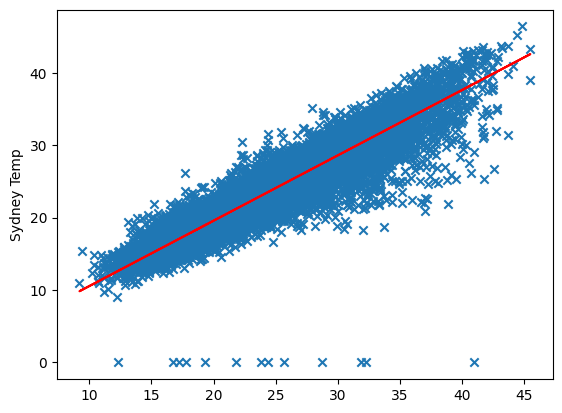

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


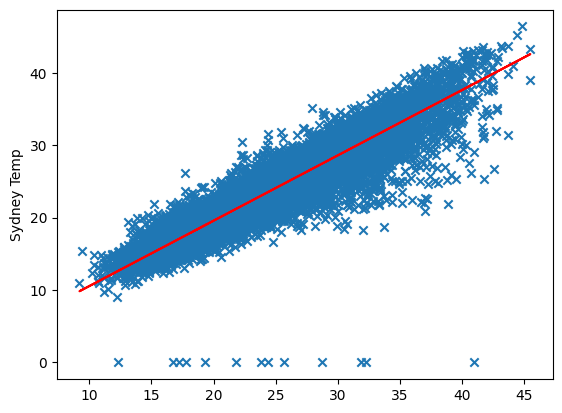

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


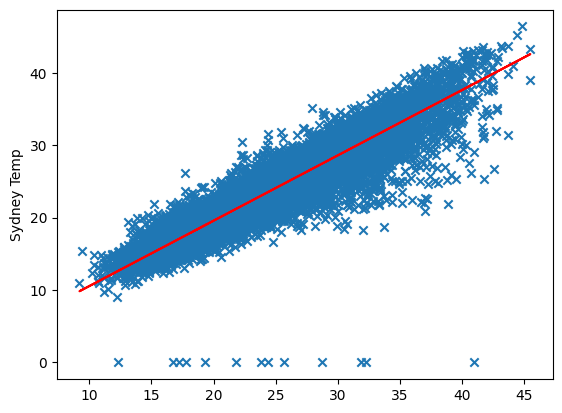

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


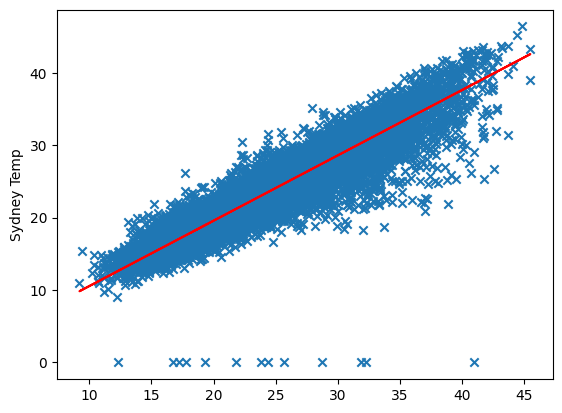

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


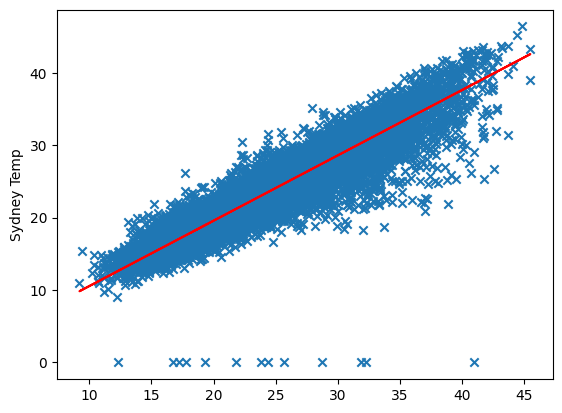

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


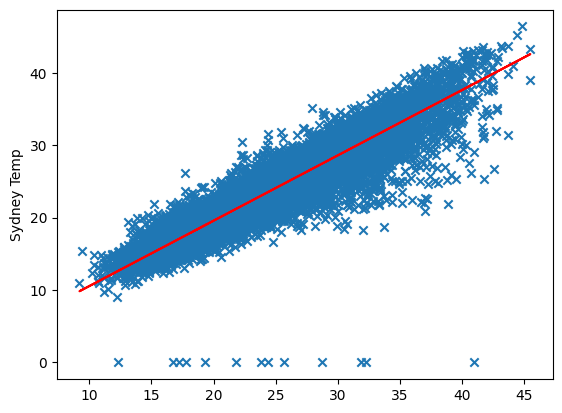

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


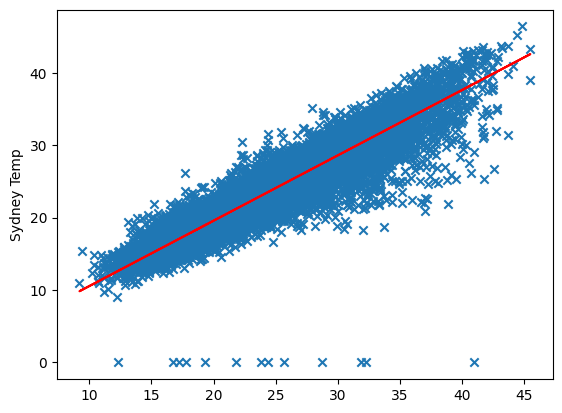

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


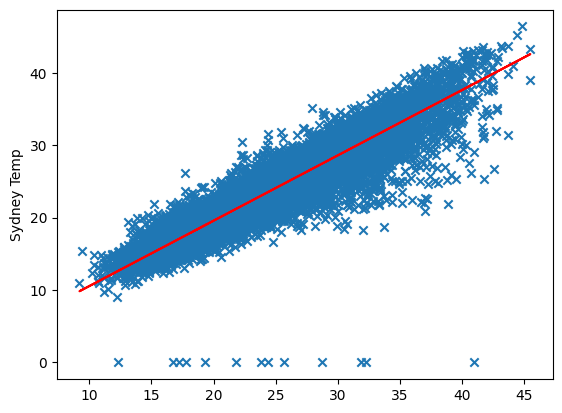

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


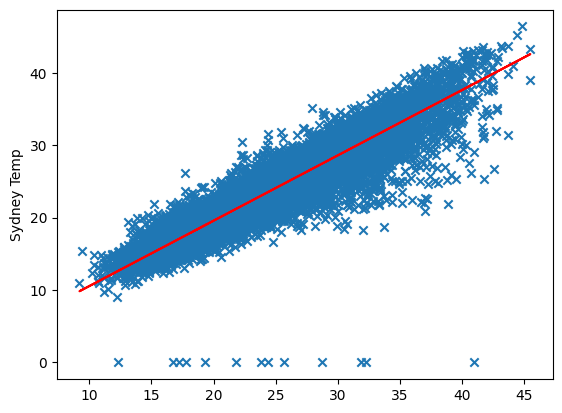

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


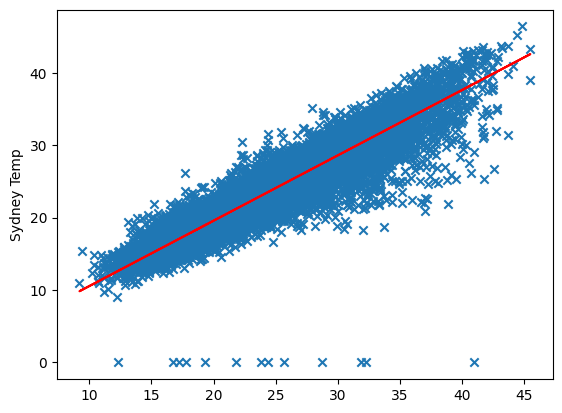

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


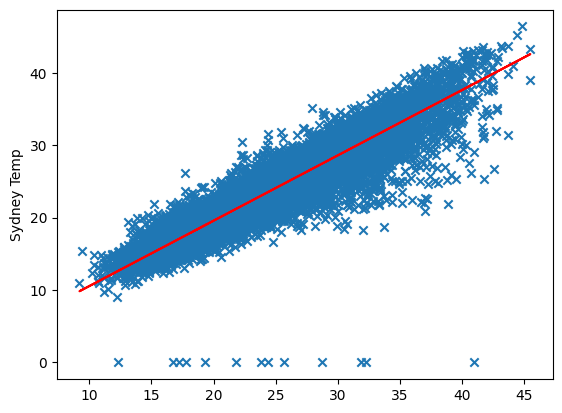

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


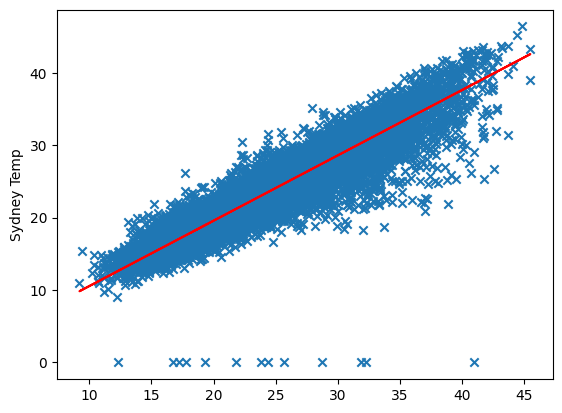

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


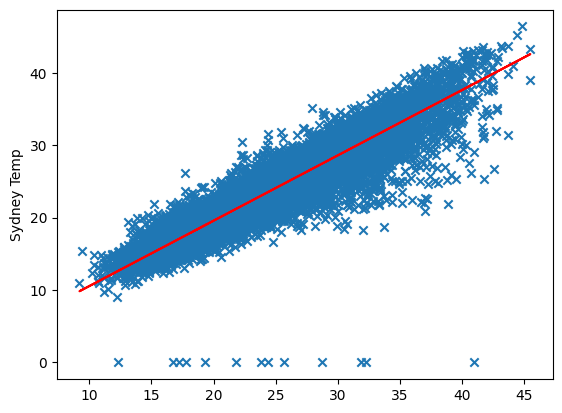

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


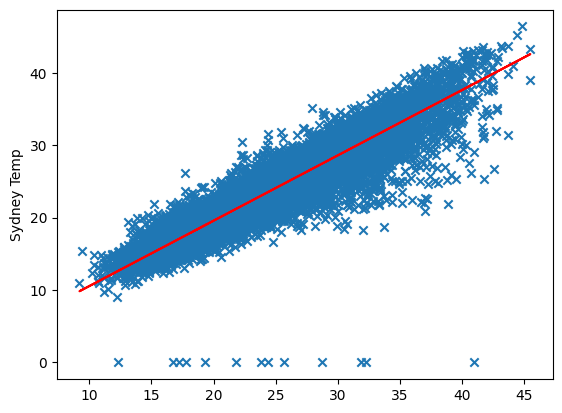

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


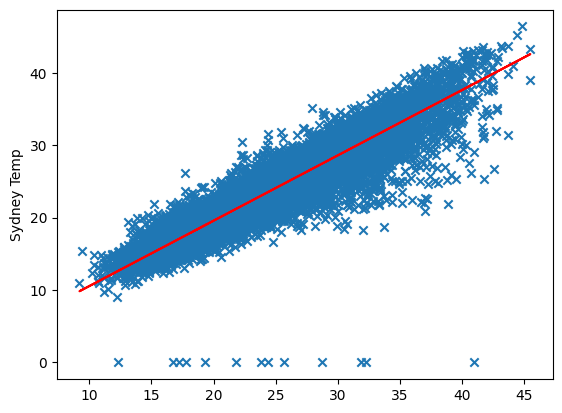

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


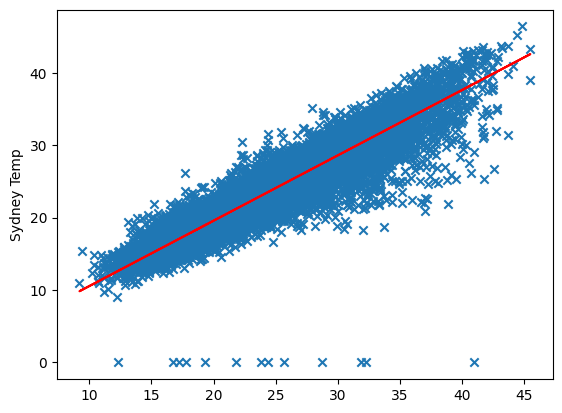

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


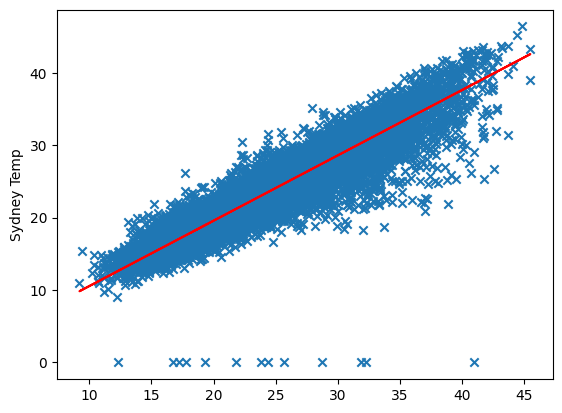

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


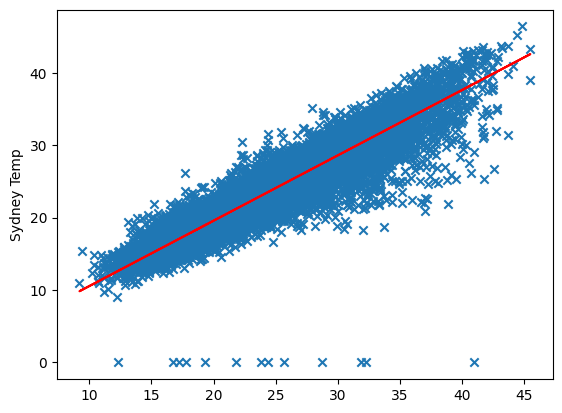

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


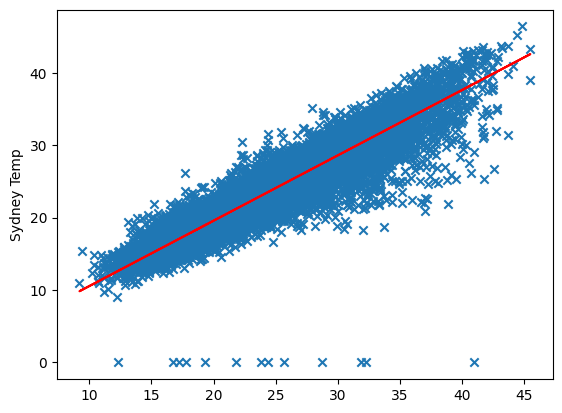

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


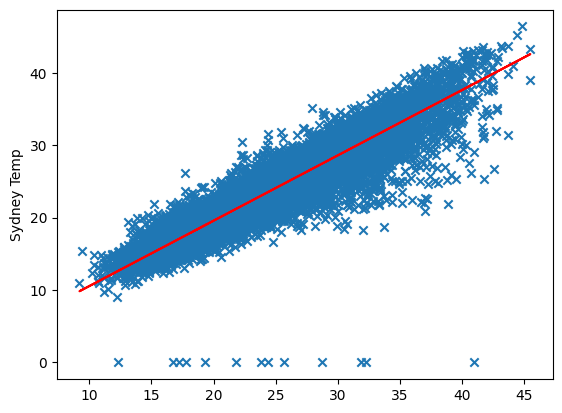

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


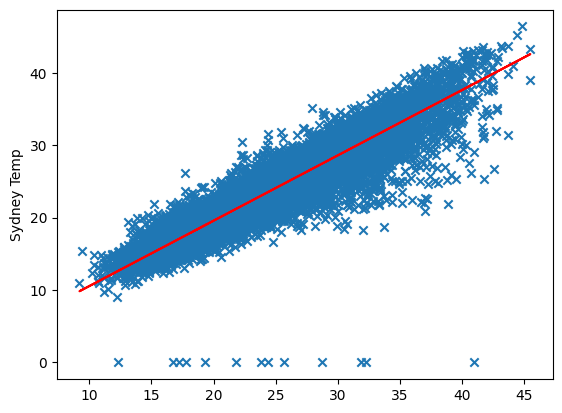

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


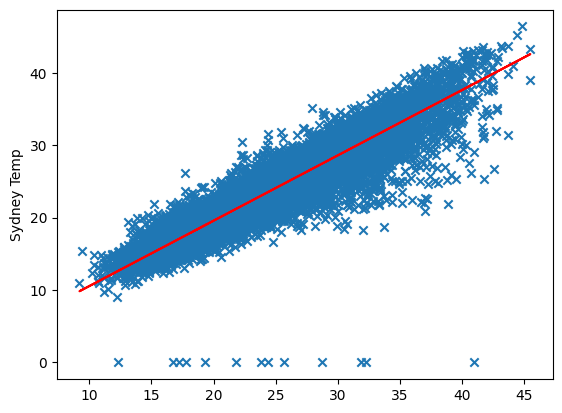

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


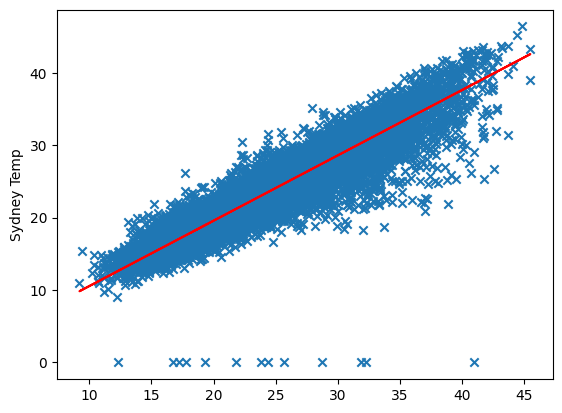

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


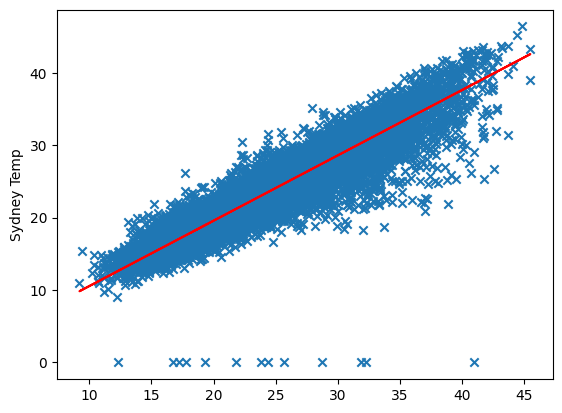

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


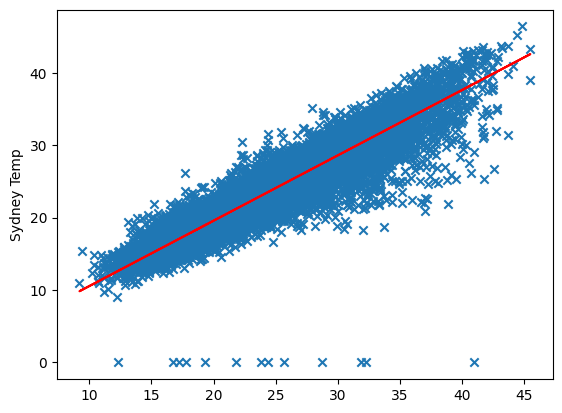

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


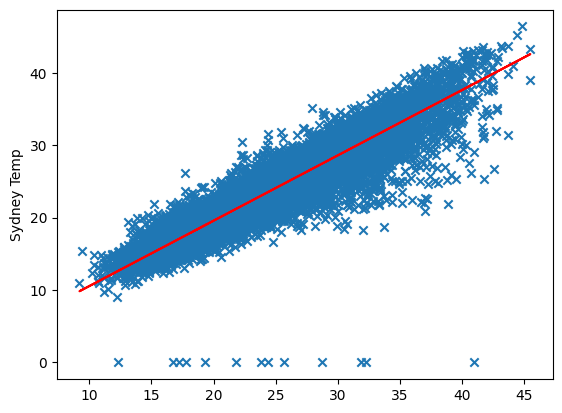

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


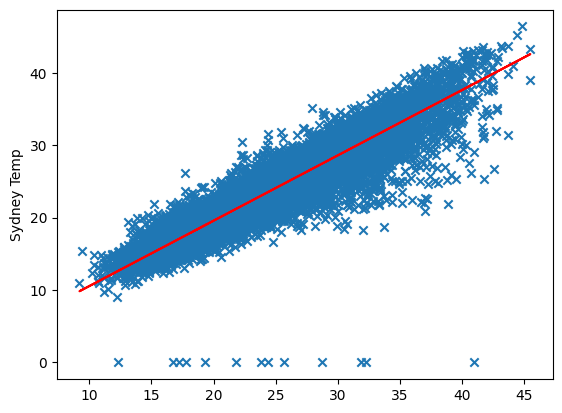

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


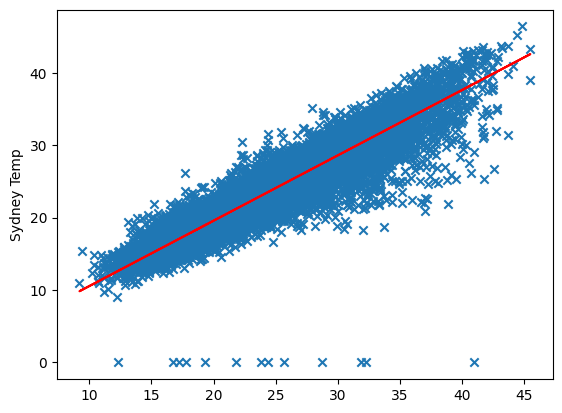

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


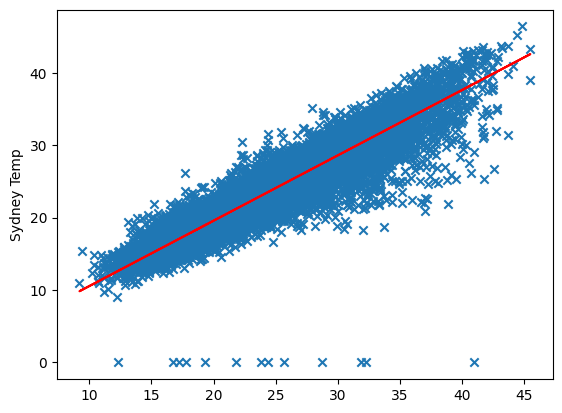

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


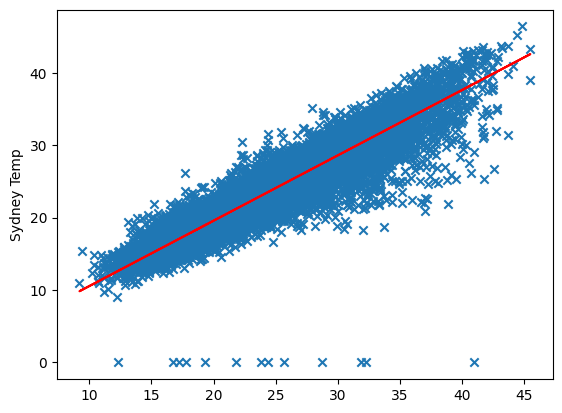

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


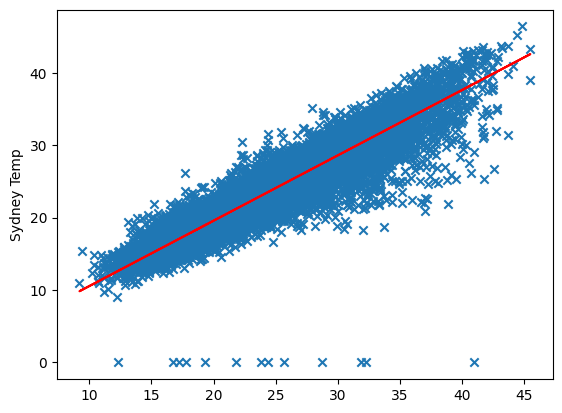

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


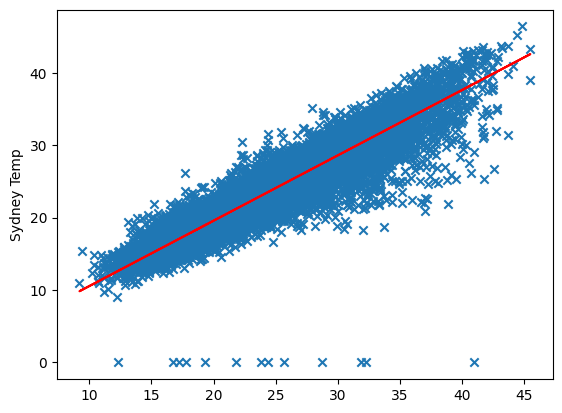

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


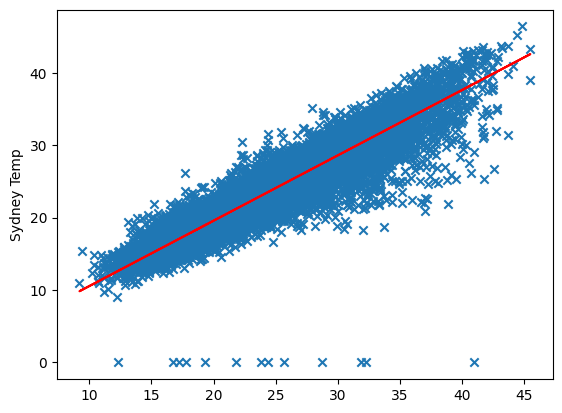

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


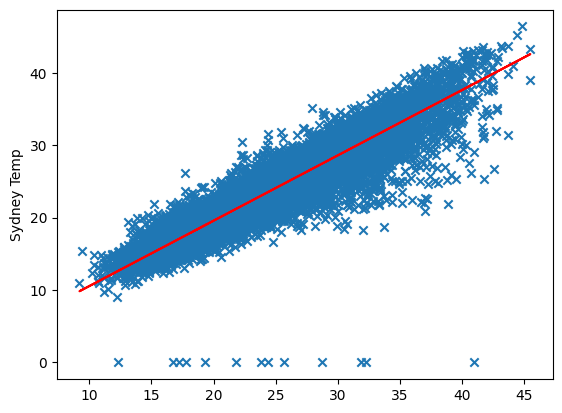

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


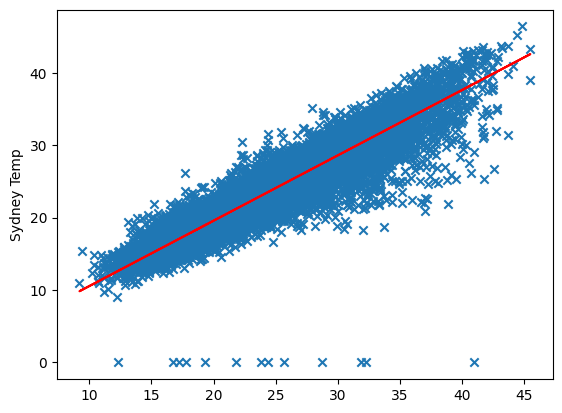

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


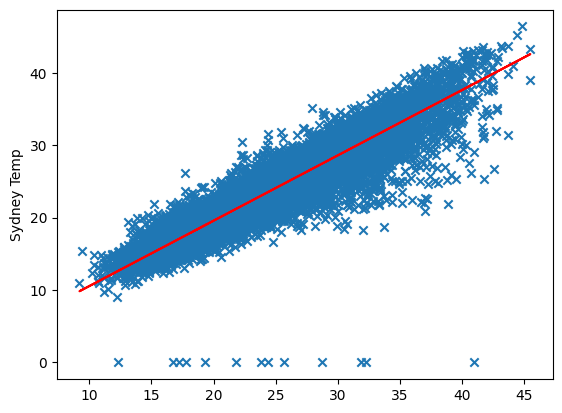

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


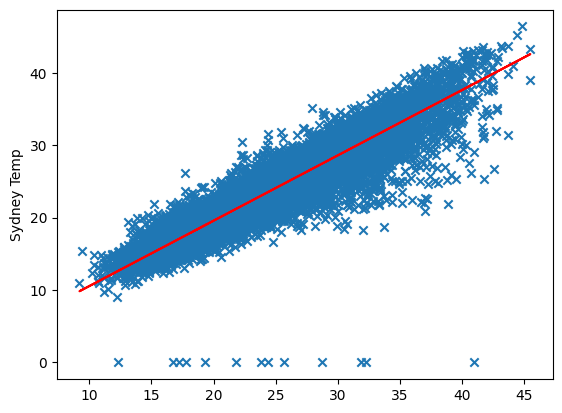

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


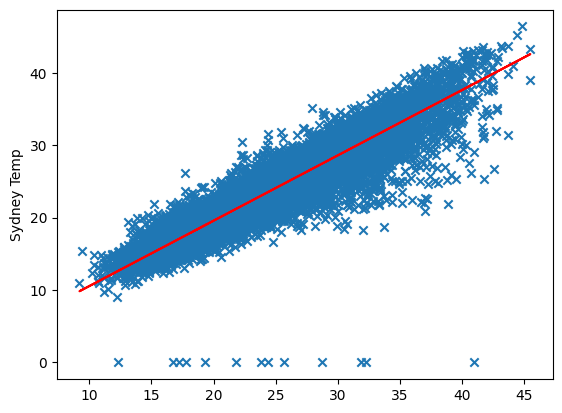

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


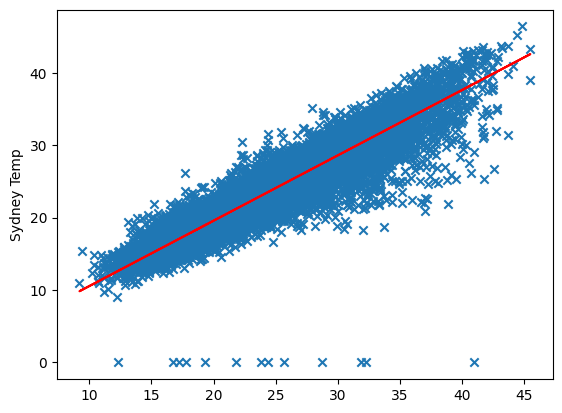

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


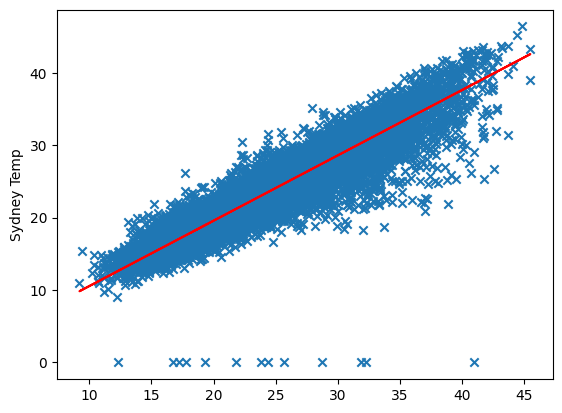

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


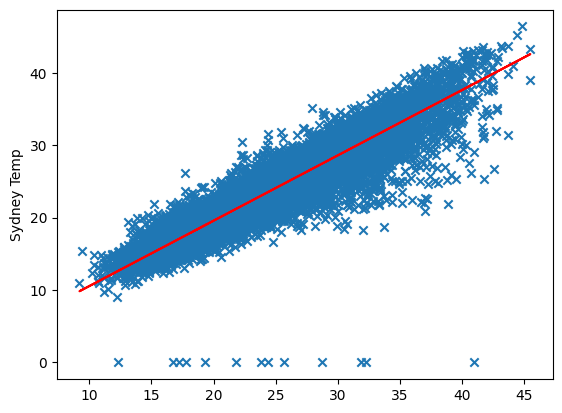

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


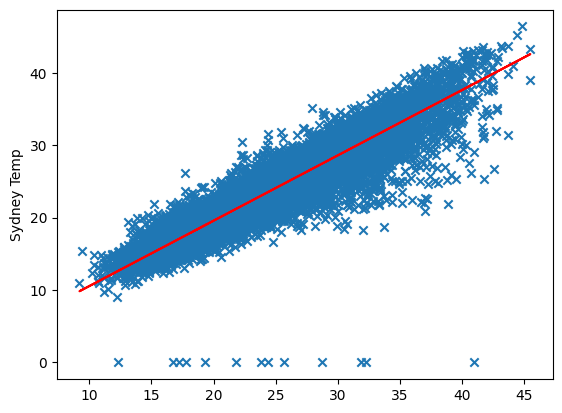

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


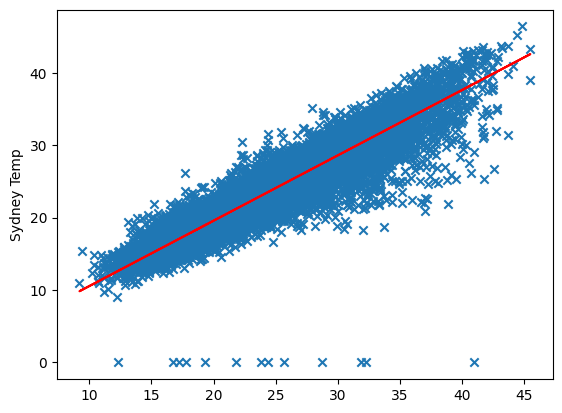

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


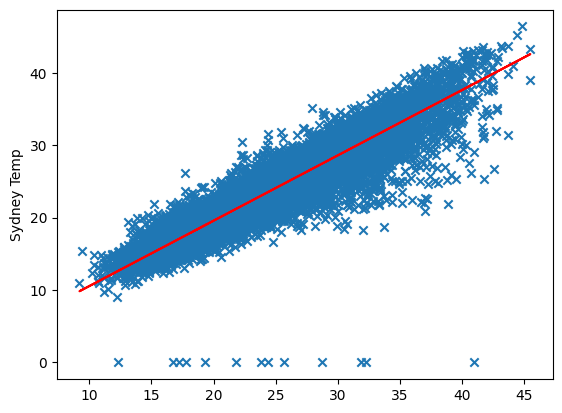

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


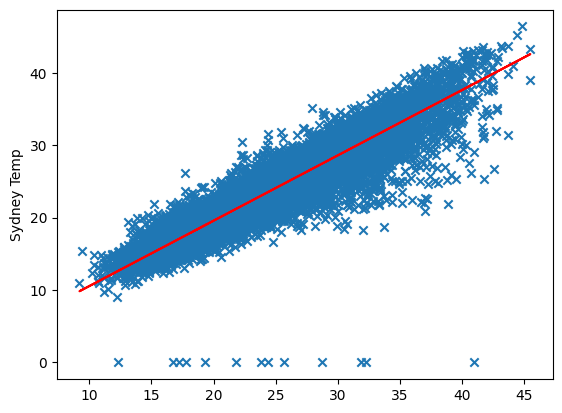

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


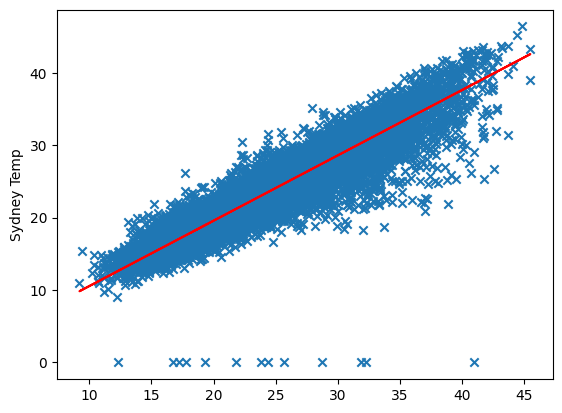

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


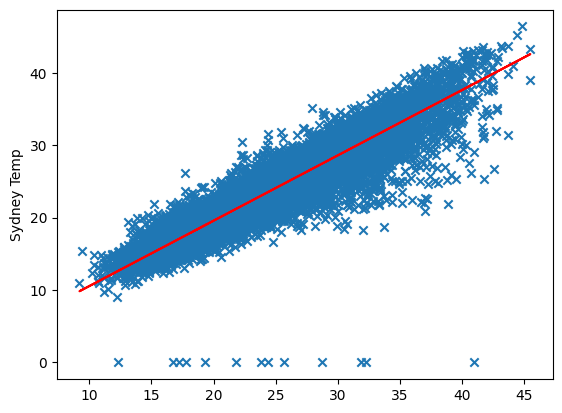

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


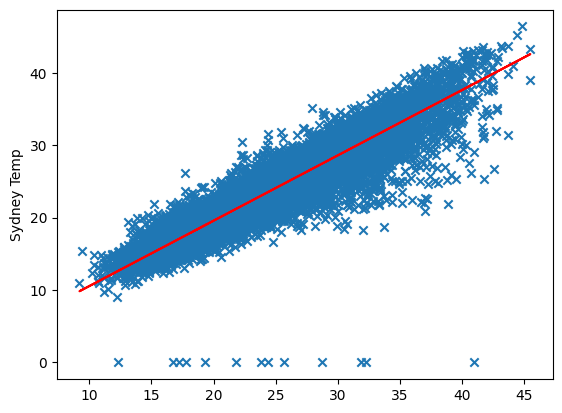

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


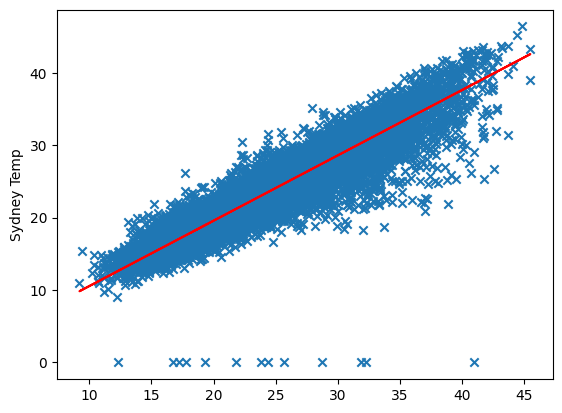

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


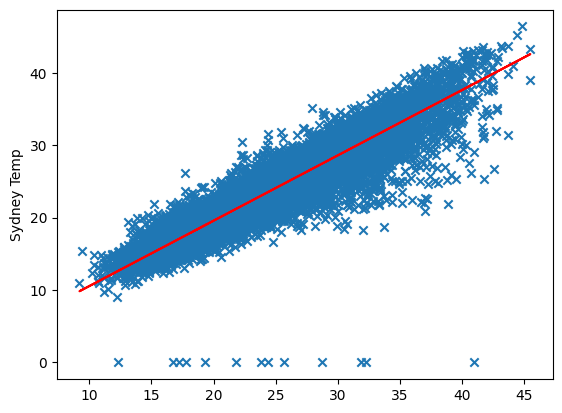

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


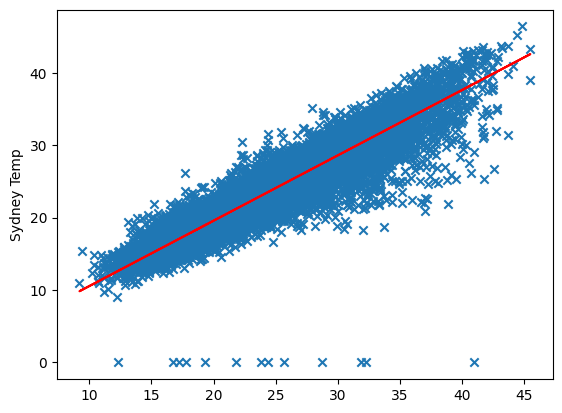

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


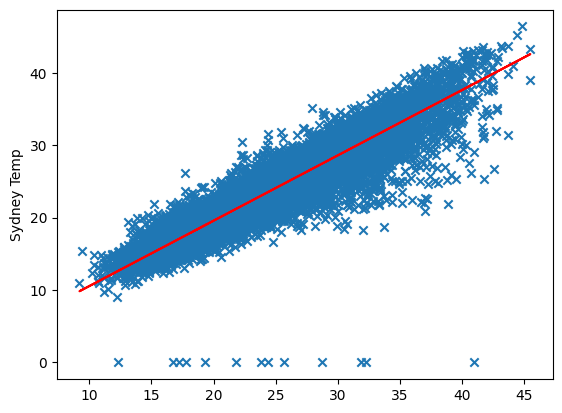

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


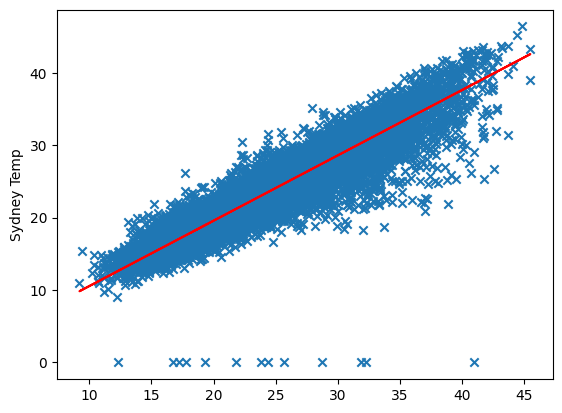

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


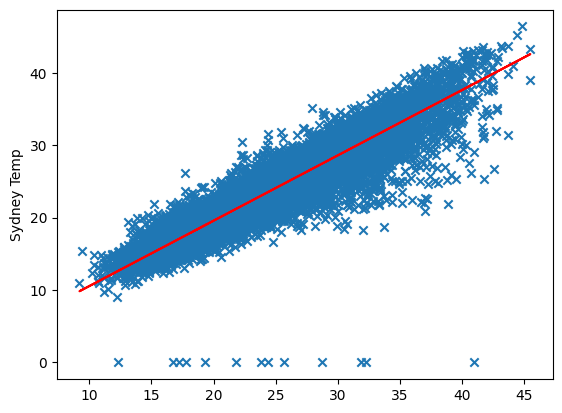

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


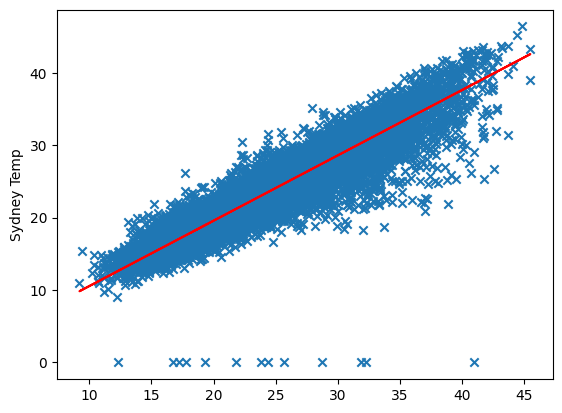

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


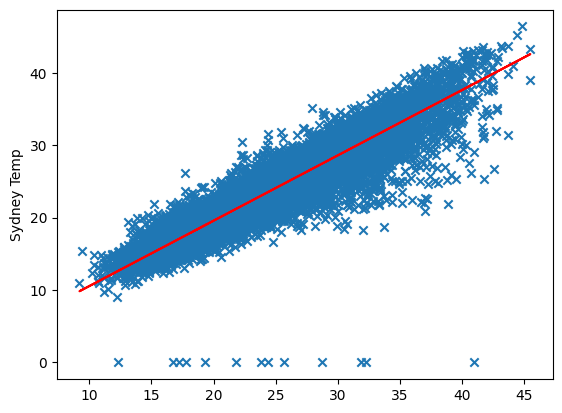

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


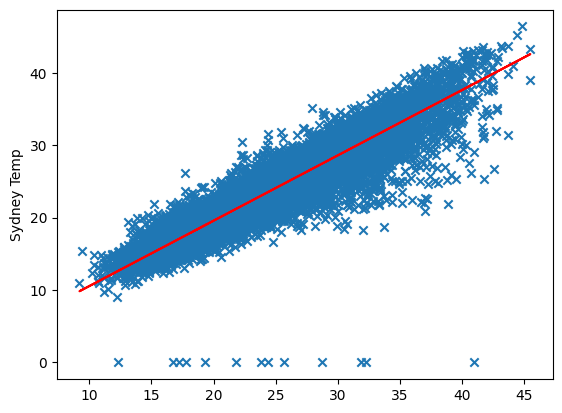

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


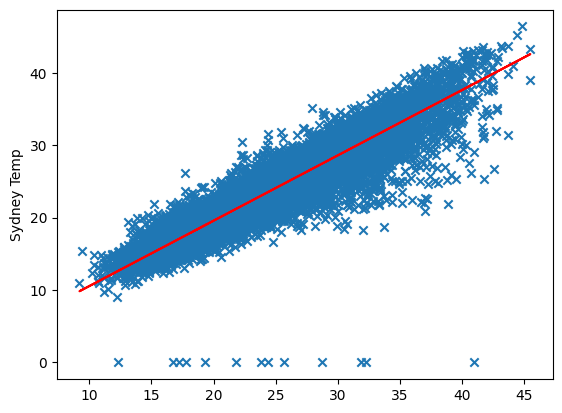

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


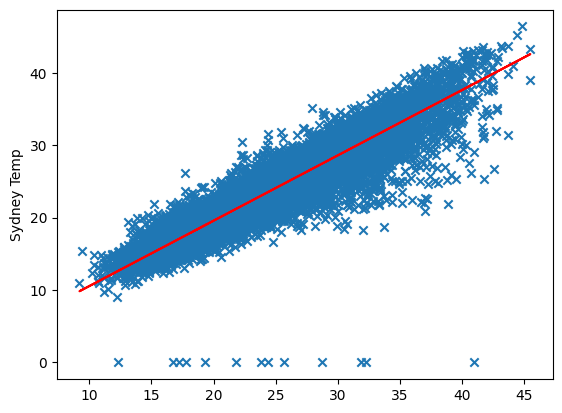

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


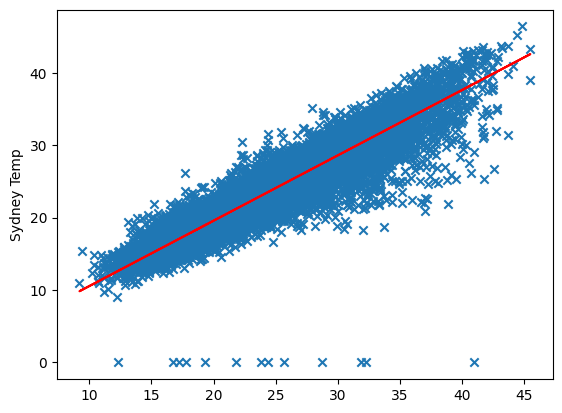

Current loss = 3.089896265459928, loss_if_m_increased = 4.716904903937168, loss_if_m_decreased = 4.620998408686282
Current loss = 3.089896265459928, loss_if_b_increased = 3.090116616167946, loss_if_b_decreased=3.0952377280297374


In [24]:
class Model():
    def __init__(self, data):
        self.dataset = data
        # self.m = 0.9
        # self.b = 0.5
        self.m = 0
        self.b = 0
        self.learning_rate = .03
        self.cycles = 100

    def plot(self):
        predictions = self.predict()
        plt.scatter(self.dataset['MaxTempNewcastleAirport'],dataset['MaxTempSydneyAirport'],marker='x')
        plt.plot(self.dataset['MaxTempNewcastleAirport'],predictions, 'r')
        plt.ylabel('Sydney Temp')
        plt.show()

    def predict(self, m=None, b=None):
        if not m: 
            m = self.m
        if not b:
            b = self.b
        # print(f'predicting with m={m}, and b = {b}')
        predictions = [x * m + b for x in dataset['MaxTempNewcastleAirport']]
        return predictions
    
    def loss(self, m=None, b=None):
        if not m: #This allows us to pass in m and b if desired, using the model's existing m and b as a fallback. 
            m = self.m
        if not b:
            b = self.b
        predictions = self.predict(m=m,b=b)
        loss = self.dataset['MaxTempSydneyAirport'] - predictions
        loss_squared = loss * loss
        mse = loss_squared.mean()
        # print(f'Predicted mse={mse}')
        return mse
    
    def decide_on_change_in_b(self):
        current_loss = self.loss()
        delta = math.sqrt(current_loss) * self.learning_rate
        loss_if_b_increased = self.loss(b=(self.b + delta))
        loss_if_b_decreased = self.loss(b=(self.b - delta))

        print(f'Current loss = {current_loss}, loss_if_b_increased = {loss_if_b_increased}, loss_if_b_decreased={loss_if_b_decreased}')

        if loss_if_b_increased < current_loss:
            print(f'Increase b by {delta}')
            return delta
        elif loss_if_b_decreased < current_loss:
            print(f'decrease b by {delta}')
            return delta
        else:
            return 0
        
    
    def decide_on_change_in_m(self):
        current_loss = self.loss()
        delta = math.sqrt(current_loss) * self.learning_rate
        loss_if_m_increased = self.loss(m=(self.m + delta))
        loss_if_m_decreased = self.loss(m=(self.m - delta))
        print(f'Current loss = {current_loss}, loss_if_m_increased = {loss_if_m_increased}, loss_if_m_decreased = {loss_if_m_decreased}')
        if loss_if_m_increased < current_loss:
            print(f'Increase by m {delta}')
            return delta
        elif loss_if_m_decreased < current_loss:
            print(f'decrease by m {delta}')
            return - delta
        else:
            return 0
    
    
    def train(self):
        for i in range(self.cycles):
            self.plot()
            self.m = self.m + self.decide_on_change_in_m()
            self.b = self.b + self.decide_on_change_in_b()

model = Model(dataset)
model.train()
